In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
a = cv2.cvtColor(cv2.imread('/home/robert.breslin/datasets/cityscapes/gtEval/val/frankfurt/frankfurt_000000_000576_gtProc_raw_edge.png'), cv2.COLOR_BGR2RGB)

(-0.5, 2047.5, 1023.5, -0.5)

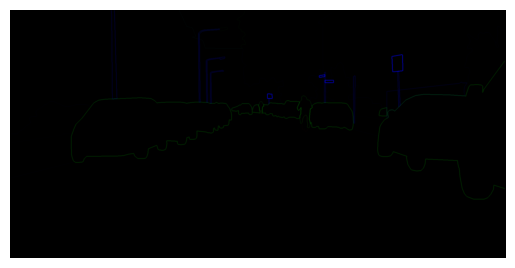

In [39]:
plt.imshow(a)
plt.axis('off')

In [40]:
display(np.unique(a), a.shape)

array([  0,   1,   2,   3,   4,   5,  16,  17,  20,  32,  33,  34,  36,
        48,  49,  52, 128, 132, 160, 164], dtype=uint8)

(1024, 2048, 3)

In [41]:
values = (a[:, :, 0].astype(np.uint32) << 16) | (a[:, :, 1] << 8) | a[:, :, 2]

In [42]:
K=19
edge_maps = np.zeros((K, a.shape[0], a.shape[1]), dtype=np.uint8)
for k in range(K):
    edge_maps[k] = (values & (1 << k)) != 0  # Binary: 1 if edge, 0 otherwise

In [43]:
edge_maps.shape

(19, 1024, 2048)

In [44]:
tmp = np.any(edge_maps, axis=0).astype(np.uint8)
np.unique(tmp)

array([0, 1], dtype=uint8)

(-0.5, 2047.5, 1023.5, -0.5)

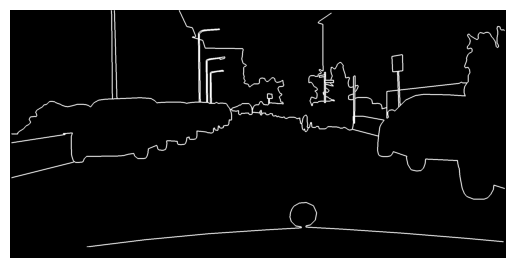

In [45]:
plt.imshow(tmp, cmap='gray')
plt.axis('off')

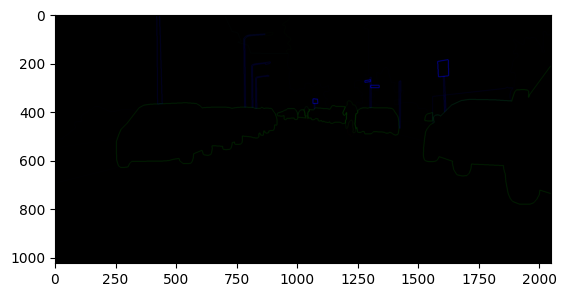

In [46]:
plt.imshow(a)

In [67]:
b = (a > 0).astype(np.uint8)
#b[b > 0] = 255
b.shape

(1024, 2048, 3)

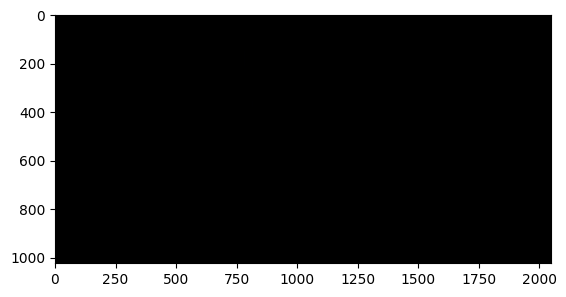

In [68]:
plt.imshow(b)

In [69]:
c = np.argmax(b, axis=2)
c.shape

(1024, 2048)

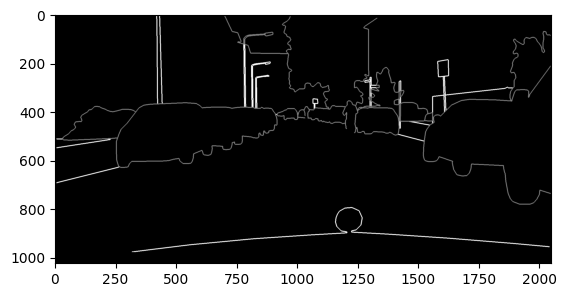

In [70]:
plt.imshow(c, cmap='gray')

In [71]:
np.rollaxis(b, 2).shape

(3, 1024, 2048)

In [72]:
d = np.max(np.rollaxis(b, 2),axis=0)
d.shape

(1024, 2048)

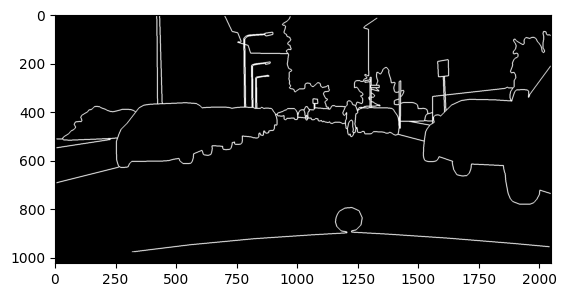

In [73]:
plt.imshow(d, cmap='gray')

In [74]:
display(np.unique(c), np.unique(d))

array([0, 1, 2])

array([0, 1], dtype=uint8)